In [13]:
# target parameters of f(x) = m*x + b
a = 3 
b = -2 
c = -3
d = 4

In [14]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)   #genero 10000 numeri casuali tra -1 e 1 (train set)
x_valid = np.random.uniform(-1, 1, 1000)    #genero 1000 numeri casuali tra -1 e 1 (validation set)
x_valid.sort()                            #ordino gli elementi
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train **3 + b * x_train **2 +c * x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid **3 + b * x_valid **2 +c * x_valid + d, sigma)

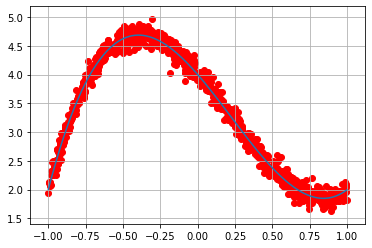

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [16]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model=tf.keras.Sequential()
model.add(Dense(3, input_shape=(1,), activation='relu'))
model.add(Dense(3, input_shape=(1,), activation='relu'))
model.add(Dense(1, input_shape=(1,), ))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.9545 - mse: 0.9545 - val_loss: 0.1958 - val_mse: 0.1958
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1728 - mse: 0.1728 - val_loss: 0.1461 - val_mse: 0.1461
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1048 - val_mse: 0.1048
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - mse: 0.0932 - val_loss: 0.0763 - val_mse: 0.0763
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - mse: 0.0714 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.

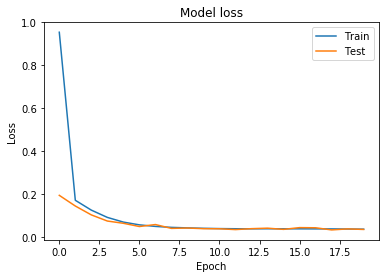

In [18]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

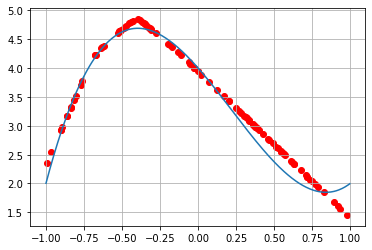

In [19]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

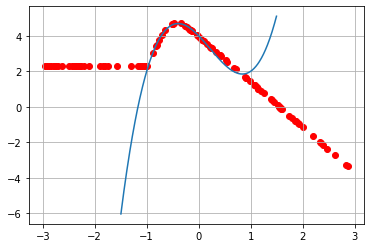

In [20]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function
x_predicted = np.random.uniform(-3, 3, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [21]:
save_model_path='Saved/model_1'
model.save(filepath=save_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: Saved/model_1/assets
